# Quantum Fourier Transformation for 3, 6 and 9 qbits

In [1]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

## Define quantum fourier transformation

In [11]:
def qft(circ, q, n):
    for j in range(n):
        for k in range(j):
            m = 2**(j-k+1)
            circ.cu1(2*math.pi/float(m), q[j], q[k])
        circ.h(q[j])
    pass
        
def execute_qft(number_of_qbits):  
    q = QuantumRegister(number_of_qbits, "q")
    c = ClassicalRegister(number_of_qbits, "c")
    qc = QuantumCircuit(q, c, name="qft")

    qft(qc,q,number_of_qbits)

    qc.measure(q,c)
    return qc

def show_hist(qc):
    job = execute(qc, backend, shots=10000)
    job.status()
    plot_histogram(job.result().get_counts(qc))
    pass

## QFT: 3 qbits with 8 outputs (2**3)

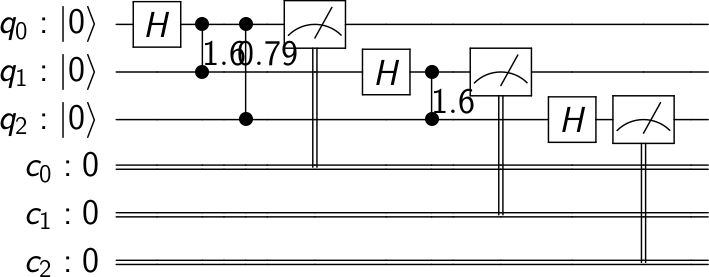

In [4]:
qc = execute_qft(3)
circuit_drawer(qc)

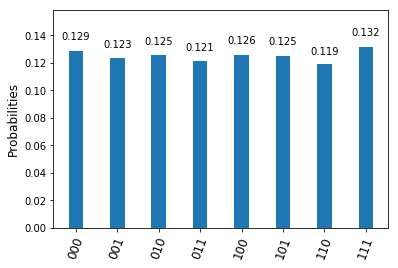

In [5]:
show_hist(qc)

## QFT: 6 qbits with 64 outputs (2**6)

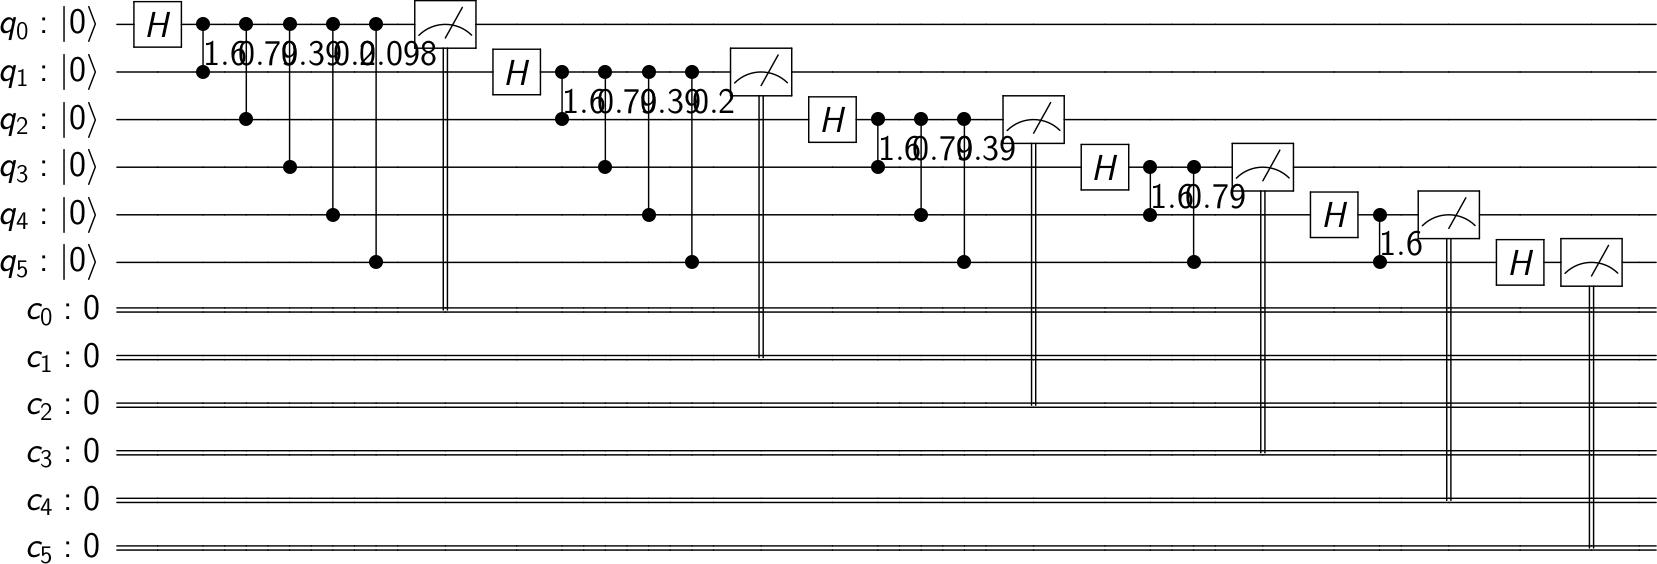

In [6]:
qc = execute_qft(6)
circuit_drawer(qc)

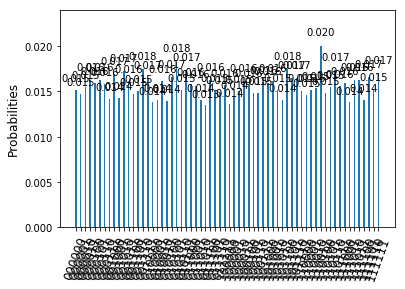

In [7]:
show_hist(qc)

## QFT: 9 qbits with 512 outputs (2**9)

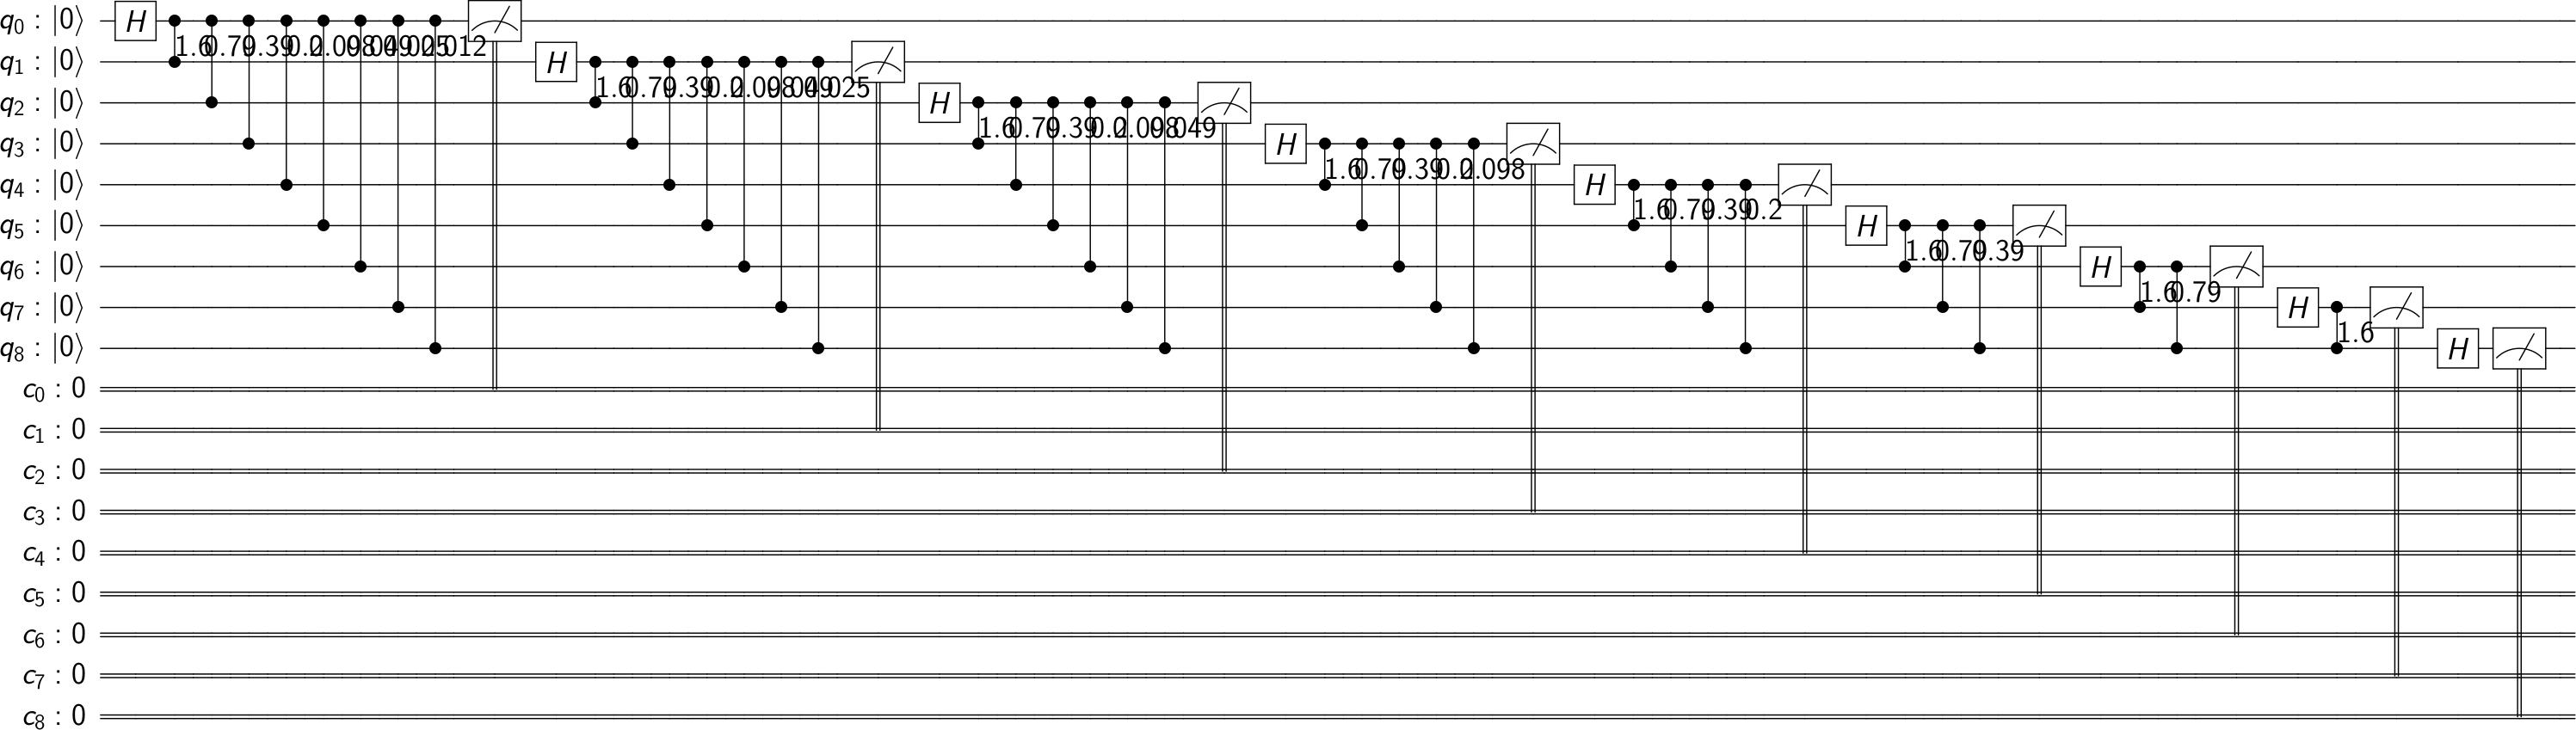

In [8]:
qc = execute_qft(9)
circuit_drawer(qc)

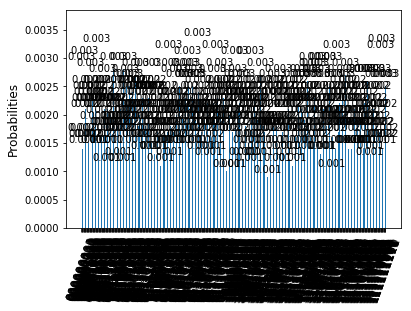

In [9]:
show_hist(qc)